# Results

In [1]:
%run mylib.py
(data, X, y)=loadXy()

Loading 'train' set
  loading  data
     shape: (281, 299, 299, 3) - dtype: float64
  loading  features
     shape: (281, 2048) - dtype: float64
  loading  filenames
     shape: (281,) - dtype: <U46
  loading  labels
     shape: (281,) - dtype: int32


Loading 'test' set
  loading  data
     shape: (51, 299, 299, 3) - dtype: float64
  loading  features
     shape: (51, 2048) - dtype: float64
  loading  filenames
     shape: (51,) - dtype: <U50
  loading  labels
     shape: (51,) - dtype: int32


Loading 'valid' set
  loading  data
     shape: (139, 299, 299, 3) - dtype: float64
  loading  features
     shape: (139, 2048) - dtype: float64
  loading  filenames
     shape: (139,) - dtype: <U30
  loading  labels
     shape: (139,) - dtype: int32


building 'trainX' set
  building  data
     shape: (420, 299, 299, 3) - dtype: float64
  building  features
     shape: (420, 2048) - dtype: float64
  building  filenames
     shape: (420,) - dtype: <U46
  building  labels
     shape: (420,) - dt

## Build a DummyClassifier as baseline

# TO BE DONE

## Load models and evaluate them

Read file with loadModel() function and use the score() method

Store result in array, append array to global on

In [5]:

model_list=['knn', 'decision-tree', 'logistic']
models_score=[]

for i in model_list:
    accuracy=loadModel(i).score(X['test'], y['test'])
    accuracy=accuracy*100
    print("  {} - Accuracy on test dataset: {:.1f}%\n".format(i, accuracy))
    models_score.append([i, accuracy])
    


Loading model from  model-knn.sav
  knn - Accuracy on test dataset: 88.2%

Loading model from  model-decision-tree.sav
  decision-tree - Accuracy on test dataset: 82.4%

Loading model from  model-logistic.sav
  logistic - Accuracy on test dataset: 96.1%



## Display results


### As a Panda DataFrame

Build a panda dataFrame and display it

In [6]:
import pandas as pd

compare_df=pd.DataFrame(models_score, columns=['Model', 'Score'])

compare_df



,Model,Score
0,knn,88.235294
1,decision-tree,82.352941
2,logistic,96.078431


### As a bar graph

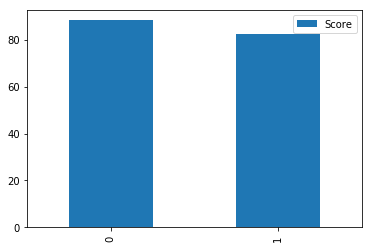

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


compare_df[['Model', 'Score']].plot.bar()
plt.show()